In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.pyplot as mtp
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lakshya Deepika P\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(r"E:\New Datasets\Fraud Detection\Fraud.csv")

In [3]:
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.dropna(how = 'any').shape

(6362620, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(keep = 'first').shape

(6362620, 11)

In [7]:
df.drop_duplicates(keep = False).shape

(6362620, 11)

In [8]:
df.dropna(subset = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 
                    'newbalanceDest', 'isFraud', 'isFlaggedFraud'], how = 'any').shape

(6362620, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['step', 'isFraud', 'isFlaggedFraud'], dtype='object'),
 dtype('float64'): Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
        'newbalanceDest'],
       dtype='object'),
 dtype('O'): Index(['type', 'nameOrig', 'nameDest'], dtype='object')}

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [14]:
df.notnull().tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,True,True,True,True,True,True,True,True,True,True,True
6362616,True,True,True,True,True,True,True,True,True,True,True
6362617,True,True,True,True,True,True,True,True,True,True,True
6362618,True,True,True,True,True,True,True,True,True,True,True
6362619,True,True,True,True,True,True,True,True,True,True,True


In [15]:
df.notnull().head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [16]:
df.apply(lambda x: x.dtype)

step              object
type              object
amount            object
nameOrig          object
oldbalanceOrg     object
newbalanceOrig    object
nameDest          object
oldbalanceDest    object
newbalanceDest    object
isFraud           object
isFlaggedFraud    object
dtype: object

In [17]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [18]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [19]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,% missing,Total missing
step,0.0,0
type,0.0,0
amount,0.0,0


In [20]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique()) 

Unique Values for Each Feature: 

step : 743
type : 5
amount : 5316900
nameOrig : 6353307
oldbalanceOrg : 1845844
newbalanceOrig : 2682586
nameDest : 2722362
oldbalanceDest : 3614697
newbalanceDest : 3555499
isFraud : 2
isFlaggedFraud : 2


In [21]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [22]:
numerical_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [23]:
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                          # we will store the categorical features in a variable

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
       type     nameOrig     nameDest
0   PAYMENT  C1231006815  M1979787155
1   PAYMENT  C1666544295  M2044282225
2  TRANSFER  C1305486145   C553264065
3  CASH_OUT   C840083671    C38997010
4   PAYMENT  C2048537720  M1230701703


In [24]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['type', 'nameOrig', 'nameDest']

In [25]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [26]:
### categorical
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['type', 'nameOrig', 'nameDest']

In [27]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  8


In [28]:
#Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [29]:
#Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 6


In [30]:
df.describe(include = object)

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1530544995,C1286084959
freq,2237500,3,113


In [31]:
type_Series = df['type']
type_levels = type_Series.unique()
type_levels

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [32]:
type_freq_table = pd.crosstab(index = df['type'], columns = 'freq')
type_freq_table

col_0,freq
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


In [33]:
name_orig_Series = df['nameOrig']
name_orig_levels = name_orig_Series.unique()
name_orig_levels

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [34]:
name_orig_freq_table = pd.crosstab(index = df['nameOrig'], columns = 'freq')
name_orig_freq_table

col_0,freq
nameOrig,
C1000000639,1
C1000001337,1
C1000001725,1
C1000002591,1
C1000003372,1
C1000003615,1
C1000004053,1
C1000004530,1
C1000005353,1


In [35]:
name_dest_Series = df['nameDest']
name_dest_levels = name_dest_Series.unique()
name_dest_levels

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [36]:
name_dest_freq_table = pd.crosstab(index = df['nameDest'], columns = 'freq')
name_dest_freq_table

col_0,freq
nameDest,
C1000004082,6
C1000004940,13
C1000013769,13
C100001587,9
C1000015936,16
C1000022185,16
C1000026379,4
C1000030947,16
C100003532,1


In [37]:
df.describe(include = 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [38]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [39]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


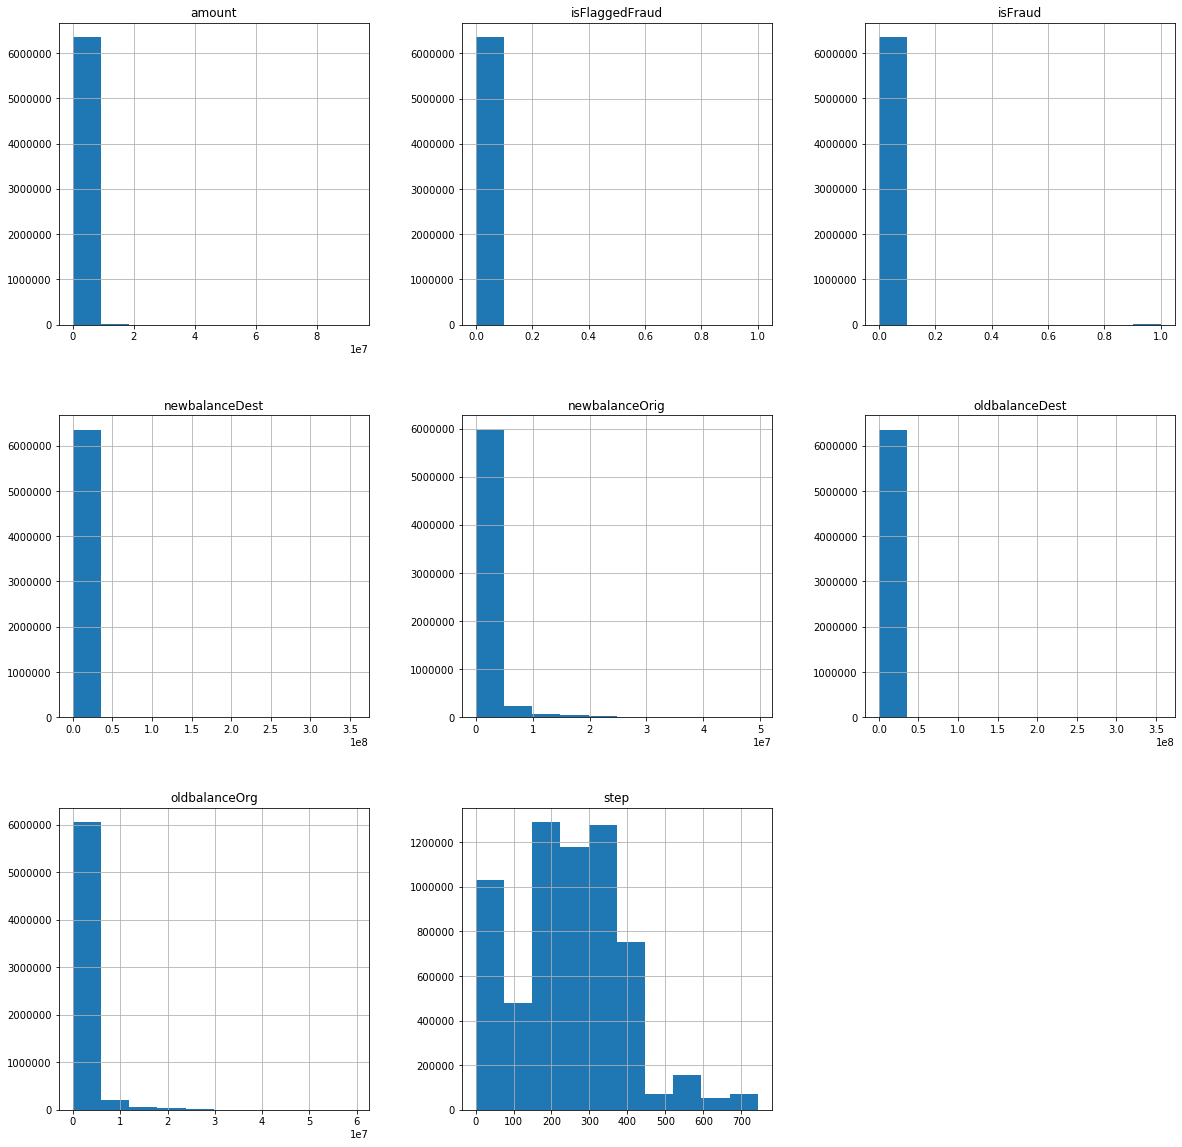

In [40]:
df.hist(figsize=(20,20))
plt.show()

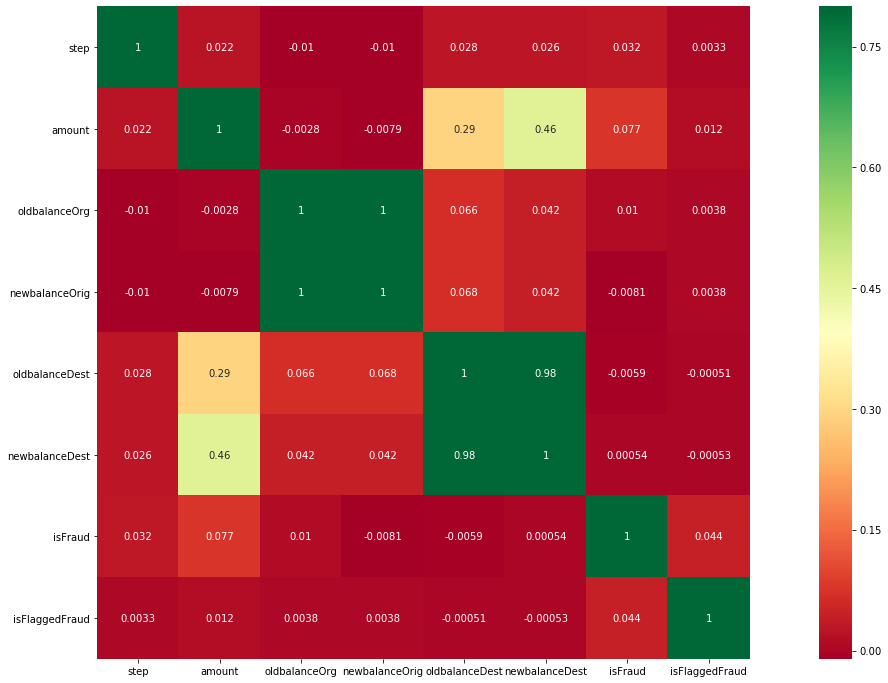

In [41]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

In [42]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

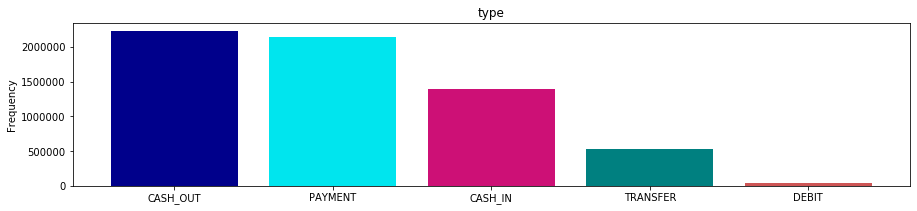

type: 
 CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [43]:
categorical_cols = ['type']
for c in categorical_cols:
    bar_plot(c)

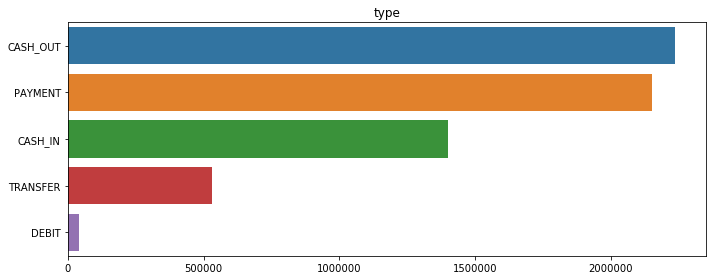

In [44]:
categorcial_variables = ['type']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [45]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ type  value counts---------------------
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
------------ nameOrig  value counts---------------------
C1530544995    3
C1462946854    3
C1677795071    3
C2098525306    3
C1999539787    3
C1784010646    3
C1065307291    3
C724452879     3
C363736674     3
C400299098     3
C1832548028    3
C1902386530    3
C545315117     3
C2051359467    3
C1976208114    3
C1433610809    2
C1157176143    2
C279832906     2
C641601300     2
C94336460      2
C2085391816    2
C180975793     2
C2037671592    2
C458582073     2
C2027898335    2
C2108249463    2
C944031474     2
C285083369     2
C384905623     2
C2002141155    2
              ..
C1295375375    1
C395392539     1
C1714572615    1
C169377289     1
C1151938048    1
C1478503594    1
C843906032     1
C393774175     1
C285468561     1
C2012690658    1
C642865662     1
C1345501813    1
C273217446     1
C1431435210    1


# EDA

In [46]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

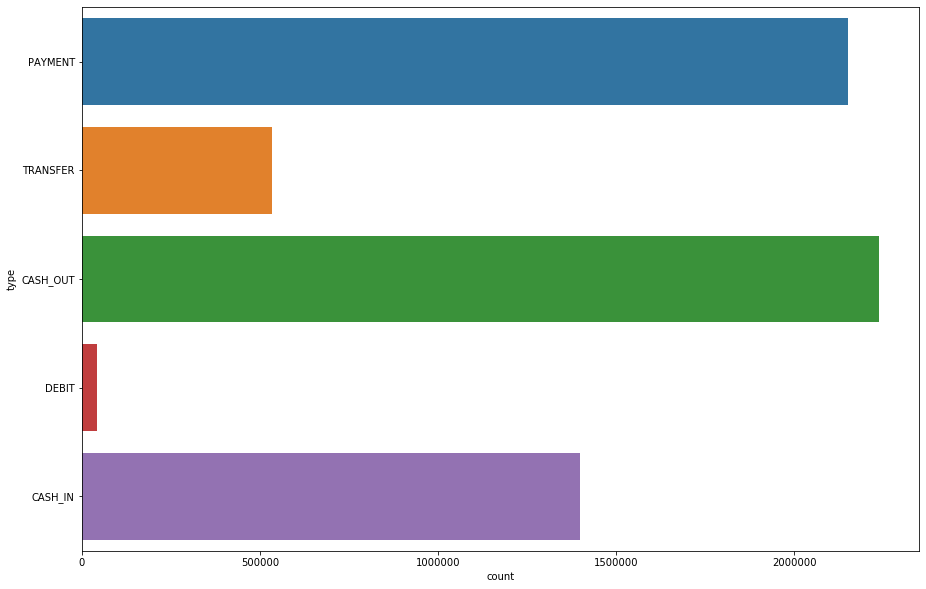

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['type'])

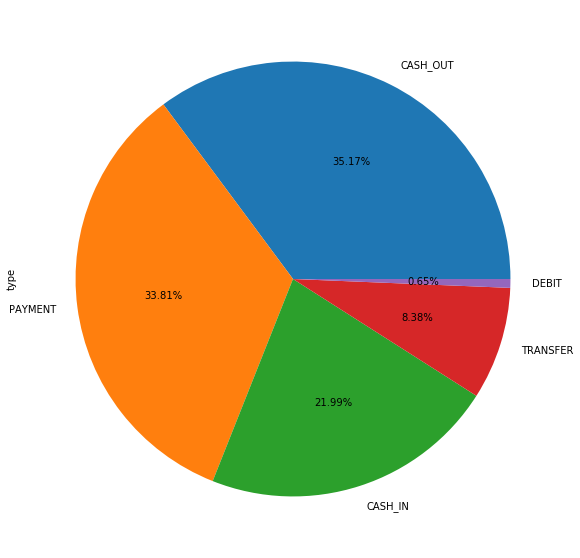

In [48]:
plt.figure(figsize=(10,10))
df['type'].value_counts().plot.pie(autopct="%0.2f%%")

In [49]:
df = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has ', len(df), ' transactions.')

The new data now has  2770409  transactions.


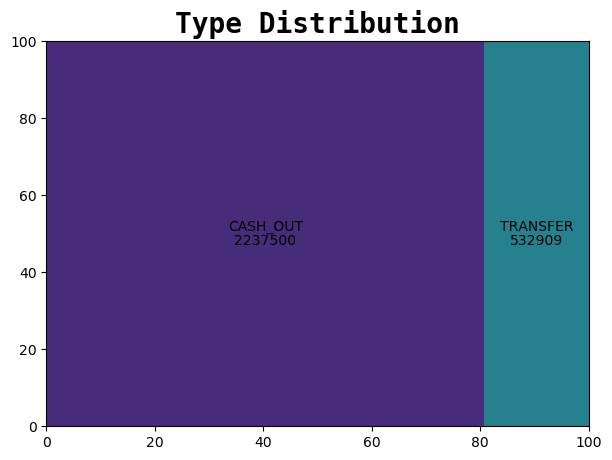

In [50]:
type = df['type'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = type.values, label = type.index, value = type.values)
plt.title('Type Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

In [51]:
df['type'] = df['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,3,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,0,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,0,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,3,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,3,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [52]:
print('Number of transactions where the transaction amount is negative: ' +
str(sum(df['amount'] < 0)))

Number of transactions where the transaction amount is negative: 0


In [53]:
# Check instances where transacted amount is 0
print('Number of transactions where the transaction amount is negative: ' +
str(sum(df['amount'] == 0)))

Number of transactions where the transaction amount is negative: 16


In [54]:
# Remove 0 amount values
df = df.loc[df['amount'] > 0,:]

In [55]:
# Defining inaccuracies in originator and recipient balances
df['origBalance_inacc'] = (df['oldbalanceOrg'] - df['amount']) - df['newbalanceOrig']
df['destBalance_inacc'] = (df['oldbalanceDest'] + df['amount']) - df['newbalanceDest']

In [57]:
# Removing name columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [58]:
# Creating dummy variables through one hot encoding for 'type' column
df = pd.get_dummies(df, columns=['type'], prefix=['type'])

In [59]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc,type_0,type_3
2,1,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,-213808.94,182703.5,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,-214605.30,237735.3,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,-300850.89,-2401220.0,0,1


In [60]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  2762196
Number of Fraud transactions:  8197
Percentage of Legit transactions: 99.7041 %
Percentage of Fraud transactions: 0.2959 %


In [61]:
df.oldbalanceOrg.value_counts()

0.00          1308566
154.00            434
124.00            427
109.00            425
186.00            425
104.00            423
175.00            420
184.00            419
146.00            418
181.00            418
159.00            416
152.00            415
171.00            414
136.00            414
195.00            413
197.00            413
167.00            410
111.00            410
177.00            409
162.00            408
198.00            408
153.00            407
166.00            407
157.00            407
151.00            407
169.00            406
161.00            405
106.00            405
164.00            404
118.00            404
               ...   
596560.04           1
1423.95             1
83857.59            1
111224.47           1
9966.50             1
25537.48            1
110978.03           1
52954.20            1
131159.27           1
82977.66            1
1289488.96          1
111152.47           1
131308.27           1
82954.91            1
11049.06  

In [62]:
df.newbalanceOrig.value_counts()

0.00           2496640
10399045.08          3
174.94               3
17316255.05          3
57263.11             3
19585040.37          3
26284.34             3
14403.77             3
2305.53              3
15986.07             2
150556.13            2
19860.25             2
23429.73             2
9527.46              2
18102.81             2
20560.29             2
55349.89             2
97154.20             2
35784.73             2
91757.10             2
41686.08             2
24983.60             2
133428.27            2
38307.09             2
5895.12              2
101101.67            2
209995.65            2
36091.37             2
7038.17              2
779.30               2
                ...   
38184.58             1
137298.15            1
38103.67             1
38101.42             1
22098.75             1
210022.78            1
7048.73              1
38187.08             1
38188.08             1
376766.46            1
2725.33              1
38096.67             1
60954.86   

In [63]:
df.newbalanceDest.value_counts()

0.00           16593
10000000.00       53
16532032.16       22
19169204.93       21
4743010.67        18
7364724.84        16
16408480.12       16
12682009.97       15
18482735.85       14
9264344.90        14
971418.91         14
23005385.41       14
4619798.56        13
4463342.32        13
17132106.53       13
1254956.07        13
23768107.88       13
4937135.42        13
13033871.02       13
18123750.85       13
1178808.14        13
4670415.04        12
4791597.89        12
1363368.51        12
3461666.05        12
7984433.54        12
6965916.76        12
5739012.22        12
15128076.87       12
6453430.91        12
               ...  
262512.21          1
1191345.08         1
7365804.99         1
106434.85          1
1186586.22         1
115646.90          1
5094446.50         1
256234.22          1
1903911.12         1
263929.79          1
314387.34          1
256236.72          1
1233480.92         1
181460.10          1
1930106.13         1
8049590.69         1
1191415.58   

# Training and Testing data

In [65]:
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [66]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)    

In [67]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

y_pred= regressor.predict(X_test)

In [69]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))  

Train Score:  0.23594382051627052
Test Score:  0.234613097631023


# Random Forest Classifier

In [70]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, Y_train)

#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [71]:
#Creating the Confusion matrix  
cm= confusion_matrix(Y_test, y_pred)
cm

array([[552457,      0],
       [     3,   1619]], dtype=int64)

# Decision Tree Classifier

In [72]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, Y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [73]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

#Creating the Confusion matrix  
cm= confusion_matrix(Y_test, y_pred)
cm

array([[552454,      3],
       [     1,   1621]], dtype=int64)